# Проект "Принятие решений в бизнесе на основе данных"

### Описание проекта

Вместе с отделом маркетинга мы подготовили список гипотез для увеличения выручки крупного интерент-магазина. В данном проекте мы приоритизируем гипотезы, запустим A/B-тест и проанализируем результаты.

## Часть 1. Приоритизация гипотез

У нас есть файл, в котором 9 гипотез по увеличению выручки интернет-магазина с указанными параметрами `Reach`, `Impact`, `Confidence`, `Effort`. На этом шаге проекта мы:

* применим фреймворк `ICE` для приоритизации гипотез, отсортируем их по убыванию приоритета;
* применим фреймворк `RICE` для приоритизации гипотез, отсортируем их по убыванию приоритета;
* укажем, как изменилась приоритизация гипотез при применении `RICE` вместо `ICE`.

Откроем файл и изучим информацию, которая в нём содержится.

In [1]:
import pandas as pd
import numpy as np
import scipy.stats as stats
import seaborn as sns
import datetime as dt
import math
import matplotlib.pyplot as plt

In [2]:
hypothesis = pd.read_csv('/datasets/hypothesis.csv')
pd.options.display.max_colwidth = 200
hypothesis.head(10)

,Hypothesis,Reach,Impact,Confidence,Efforts
0,"Добавить два новых канала привлечения трафика, что позволит привлекать на 30% больше пользователей",3,10,8,6
1,"Запустить собственную службу доставки, что сократит срок доставки заказов",2,5,4,10
2,"Добавить блоки рекомендаций товаров на сайт интернет магазина, чтобы повысить конверсию и средний чек заказа",8,3,7,3
3,"Изменить структура категорий, что увеличит конверсию, т.к. пользователи быстрее найдут нужный товар",8,3,3,8
4,"Изменить цвет фона главной страницы, чтобы увеличить вовлеченность пользователей",3,1,1,1
5,"Добавить страницу отзывов клиентов о магазине, что позволит увеличить количество заказов",3,2,2,3
6,"Показать на главной странице баннеры с актуальными акциями и распродажами, чтобы увеличить конверсию",5,3,8,3
7,"Добавить форму подписки на все основные страницы, чтобы собрать базу клиентов для email-рассылок",10,7,8,5
8,"Запустить акцию, дающую скидку на товар в день рождения",1,9,9,5


In [3]:
hypothesis.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9 entries, 0 to 8
Data columns (total 5 columns):
Hypothesis    9 non-null object
Reach         9 non-null int64
Impact        9 non-null int64
Confidence    9 non-null int64
Efforts       9 non-null int64
dtypes: int64(4), object(1)
memory usage: 488.0+ bytes


Датафрейм содержит следующую информацию: 

* Hypothesis — краткое описание гипотезы;
* Reach — охват пользователей по 10-балльной шкале;
* Impact — влияние на пользователей по 10-балльной шкале;
* Confidence — уверенность в гипотезе по 10-балльной шкале;
* Efforts — затраты ресурсов на проверку гипотезы по 10-балльной шкале. Чем больше значение Efforts, тем дороже проверка гипотезы.

Проблем с пропусками и типами данных нет.

Применим фреймворк `ICE` для приоритезации гипотез. Формула `ICE`:

$$ICE = \frac{Impact * Confidence}{Efforts}$$

Для этого добавим соответствующий столбец в таблицу и отсортируем гипотезы по убыванию приоритета.

In [4]:
hypothesis['ICE'] = hypothesis['Impact'] * hypothesis['Confidence'] / hypothesis['Efforts']
hypothesis[['Hypothesis', 'ICE']].sort_values(by='ICE', ascending=False)

,Hypothesis,ICE
8,"Запустить акцию, дающую скидку на товар в день рождения",16.200000
0,"Добавить два новых канала привлечения трафика, что позволит привлекать на 30% больше пользователей",13.333333
7,"Добавить форму подписки на все основные страницы, чтобы собрать базу клиентов для email-рассылок",11.200000
6,"Показать на главной странице баннеры с актуальными акциями и распродажами, чтобы увеличить конверсию",8.000000
2,"Добавить блоки рекомендаций товаров на сайт интернет магазина, чтобы повысить конверсию и средний чек заказа",7.000000
1,"Запустить собственную службу доставки, что сократит срок доставки заказов",2.000000
5,"Добавить страницу отзывов клиентов о магазине, что позволит увеличить количество заказов",1.333333
3,"Изменить структура категорий, что увеличит конверсию, т.к. пользователи быстрее найдут нужный товар",1.125000
4,"Изменить цвет фона главной страницы, чтобы увеличить вовлеченность пользователей",1.000000


Видим, что при применении данного фреймворка самой приоритетной является гипотеза 8. Также в тройке лидеров гипотезы 0 и 7.
Применим фреймворк `RICE`. Формула `RICE`:

$$RICE = \frac{Rearch * Impact * Confidence}{Efforts}$$

Добавим соответствующий столбец в таблицу и отсортируем гипотезы по убыванию приоритета.

In [5]:
hypothesis['RICE'] = hypothesis['Reach'] * hypothesis['Impact'] * hypothesis['Confidence'] / hypothesis['Efforts']
hypothesis[['Hypothesis', 'RICE']].sort_values(by='RICE', ascending=False)

,Hypothesis,RICE
7,"Добавить форму подписки на все основные страницы, чтобы собрать базу клиентов для email-рассылок",112.0
2,"Добавить блоки рекомендаций товаров на сайт интернет магазина, чтобы повысить конверсию и средний чек заказа",56.0
0,"Добавить два новых канала привлечения трафика, что позволит привлекать на 30% больше пользователей",40.0
6,"Показать на главной странице баннеры с актуальными акциями и распродажами, чтобы увеличить конверсию",40.0
8,"Запустить акцию, дающую скидку на товар в день рождения",16.2
3,"Изменить структура категорий, что увеличит конверсию, т.к. пользователи быстрее найдут нужный товар",9.0
1,"Запустить собственную службу доставки, что сократит срок доставки заказов",4.0
5,"Добавить страницу отзывов клиентов о магазине, что позволит увеличить количество заказов",4.0
4,"Изменить цвет фона главной страницы, чтобы увеличить вовлеченность пользователей",3.0


Видим, что теперь самой приоритетной является гипотеза 7. Также в тройке появилась гипотеза 2, а под номером 8 "упала" на 5-е место. Так произошло потому, что мы добавили дополнительный компонент `Reach` (скольких пользователей затронет изменение, которое мы хотим внести). Он сильно повлиял на итоговый результат, так как форма подписки на основных страничках охватит намного больше пользователей, чем акция дающая скидку на товар в день рождения.


$$ICE = \frac{Impact * Confidence}{Efforts}$$

$$RICE = \frac{Rearch * Impact * Confidence}{Efforts}$$

## Часть 2. Анализ A/B-теста

Мы провели A/B-тест и получили результаты, которые описаны в файлах `/datasets/orders.csv` и `/datasets/visitors.csv`. Посмотрим на информацию, которую они содержат. 

Файл `/datasets/orders.csv`:
* transactionId — идентификатор заказа;
* visitorId — идентификатор пользователя, совершившего заказ;
* date — дата, когда был совершён заказ;
* revenue — выручка заказа;
* group — группа A/B-теста, в которую попал заказ.

Файл `/datasets/visitors.csv`:
* date — дата;
* group — группа A/B-теста;
* visitors — количество пользователей в указанную дату в указанной группе A/B-теста.

Откроем эти файлы.

In [6]:
orders = pd.read_csv('/datasets/orders.csv')
orders.head(10)

,transactionId,visitorId,date,revenue,group
0,3667963787,3312258926,2019-08-15,1650,B
1,2804400009,3642806036,2019-08-15,730,B
2,2961555356,4069496402,2019-08-15,400,A
3,3797467345,1196621759,2019-08-15,9759,B
4,2282983706,2322279887,2019-08-15,2308,B
5,182168103,935554773,2019-08-15,2210,B
6,398296753,2900797465,2019-08-15,1860,B
7,2626614568,78758296,2019-08-15,1044,A
8,1576988021,295230930,2019-08-15,13710,A
9,1506739906,1882260405,2019-08-15,1855,B


In [7]:
orders.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1197 entries, 0 to 1196
Data columns (total 5 columns):
transactionId    1197 non-null int64
visitorId        1197 non-null int64
date             1197 non-null object
revenue          1197 non-null int64
group            1197 non-null object
dtypes: int64(3), object(2)
memory usage: 46.9+ KB


In [8]:
visitors = pd.read_csv('/datasets/visitors.csv')
visitors.head(10)

,date,group,visitors
0,2019-08-01,A,719
1,2019-08-02,A,619
2,2019-08-03,A,507
3,2019-08-04,A,717
4,2019-08-05,A,756
5,2019-08-06,A,667
6,2019-08-07,A,644
7,2019-08-08,A,610
8,2019-08-09,A,617
9,2019-08-10,A,406


In [9]:
visitors.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 62 entries, 0 to 61
Data columns (total 3 columns):
date        62 non-null object
group       62 non-null object
visitors    62 non-null int64
dtypes: int64(1), object(2)
memory usage: 1.6+ KB


Видим, что в обеих таблицах столбцы с датами нужно привести к правильному типу, сделаем это.

In [10]:
orders['date'] = orders['date'].map(lambda x: dt.datetime.strptime(x, '%Y-%m-%d'))
visitors['date'] = visitors['date'].map(lambda x: dt.datetime.strptime(x, '%Y-%m-%d'))

Создадим массив уникальных пар значений дат и групп теста методом `drop_duplicates()`

In [11]:
datesGroups = orders[['date','group']].drop_duplicates()

Соберём агрегированные кумулятивные по дням данные о заказах. Получим строки таблицы orders, дата которых меньше или равна дате элемента из `datesGroups`, а группа теста равна группе из `datesGroups`. Затем агрегируем значения. Вычислим максимальную дату. Для группы тоже рассчитаем максимум, чтобы столбец `group` не пропал из итогового вывода. Найдём число уникальных ID заказов и пользователей. Подсчитаем сумму средних чеков.

In [12]:
ordersAggregated = datesGroups\
    .apply(lambda x: orders[np.logical_and(orders['date'] <= x['date'], orders['group'] == x['group'])]\
    .agg({'date':'max','group':'max','transactionId':pd.Series.nunique,'visitorId':pd.Series.nunique,'revenue':'sum'}),axis=1)\
    .sort_values(by=['date','group'])

Получим агрегированные кумулятивные по дням данные о посетителях интернет-магазина.

In [13]:
visitorsAggregated = datesGroups\
    .apply(lambda x: visitors[np.logical_and(visitors['date'] <= x['date'], visitors['group'] == x['group'])]\
    .agg({'date':'max','group':'max','visitors':'sum'}), axis=1)\
    .sort_values(by=['date','group']) 

Объединим обе таблицы в одной с понятными названиями столбцов.

In [14]:
cumulativeData = ordersAggregated.merge(visitorsAggregated, left_on=['date', 'group'], right_on=['date', 'group'])
cumulativeData.columns = ['date', 'group', 'orders', 'buyers', 'revenue', 'visitors']
cumulativeData.head()

,date,group,orders,buyers,revenue,visitors
0,2019-08-01,A,24,20,148579,719
1,2019-08-01,B,21,20,101217,713
2,2019-08-02,A,44,38,242401,1338
3,2019-08-02,B,45,43,266748,1294
4,2019-08-03,A,68,62,354874,1845


Построим графики кумулятивной выручки по дням и группам A/B-тестирования. Для этого создадим датафреймы с кумулятивным количеством заказов и кумулятивной выручкой по дням в группах A и B.

In [15]:
cumulativeRevenueA = cumulativeData[cumulativeData['group']=='A'][['date','revenue', 'orders']]
cumulativeRevenueB = cumulativeData[cumulativeData['group']=='B'][['date','revenue', 'orders']]

Теперь строим графики.

/opt/conda/lib/python3.7/site-packages/pandas/plotting/_matplotlib/converter.py:103: FutureWarning: Using an implicitly registered datetime converter for a matplotlib plotting method. The converter was registered by pandas on import. Future versions of pandas will require you to explicitly register matplotlib converters.

To register the converters:
	>>> from pandas.plotting import register_matplotlib_converters
	>>> register_matplotlib_converters()
  warnings.warn(msg, FutureWarning)


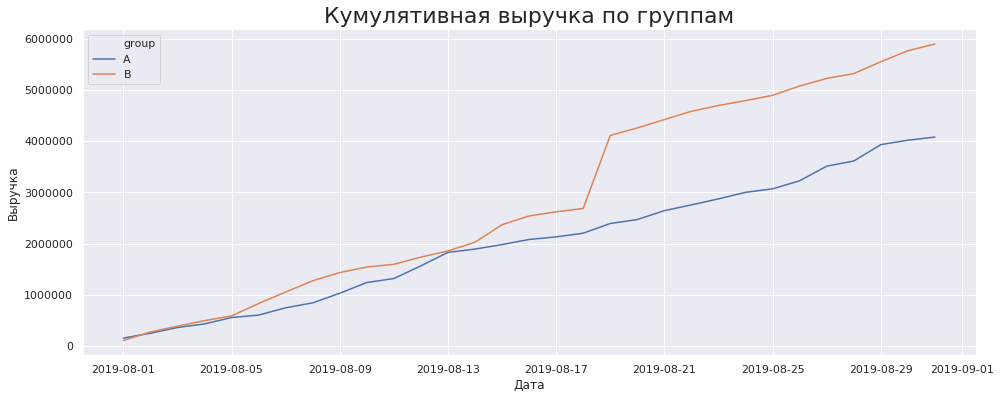

In [16]:
sns.set()
fig, ax = plt.subplots(figsize=(16,6))
sns.lineplot(data=cumulativeData, x='date', y='revenue', hue='group')
plt.title('Кумулятивная выручка по группам', fontsize=22)
plt.xlabel('Дата', size=12)
plt.ylabel('Выручка', size=12)
plt.show()

Видим, что в группе A выручка растёт равномерно, а в группе B был заметный скачок. Это может сигнализировать о всплесках числа заказов, либо о появлении очень дорогих заказов в выборке.

Построим графики среднего чека по группам. Разделим кумулятивную выручку на кумулятивное число заказов.

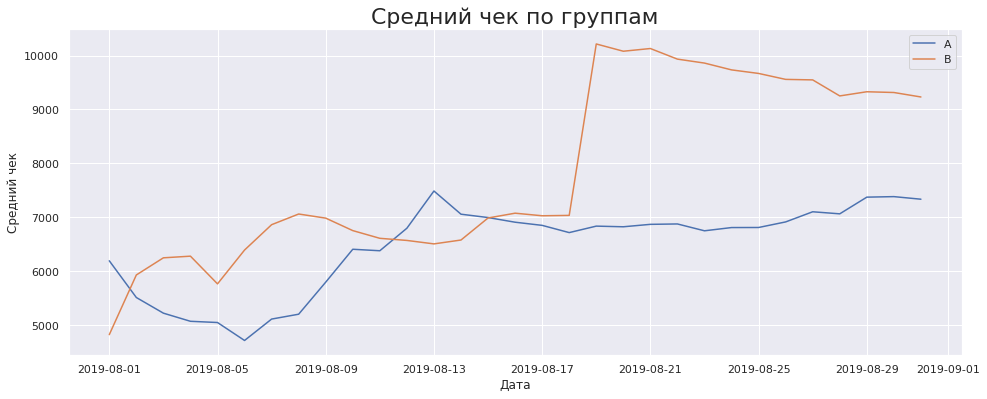

In [17]:
sns.set()
fig, ax = plt.subplots(figsize=(16,6))
sns.lineplot(data=cumulativeRevenueA, x='date', y=cumulativeRevenueA['revenue']/cumulativeRevenueA['orders'], label='A')
sns.lineplot(data=cumulativeRevenueB, x='date', y=cumulativeRevenueB['revenue']/cumulativeRevenueB['orders'], label='B')
plt.title('Средний чек по группам', fontsize=22)
plt.xlabel('Дата', size=12)
plt.ylabel('Средний чек', size=12)
plt.show()

Средний чек становится более менее равномерным в группе A ближе к концу теста. В группе B наблюдаем резкий всплеск, который может быть обусловлен попаданием крупных заказов. Скорее всего этой группе нужно больше данных, чтобы прийти к реальному среднему чеку и установиться на его уровне.

Построим график относительного различия для среднего чека. Для этого соберём данные в одном датафрейме.

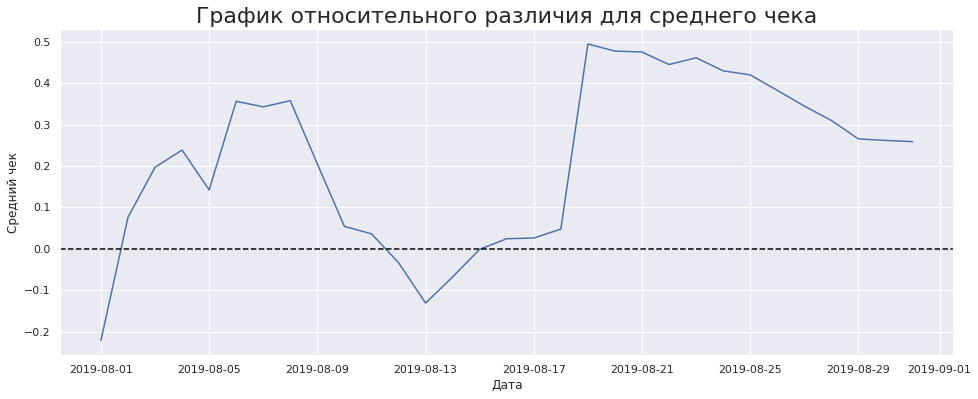

In [18]:
mergedCumulativeRevenue = cumulativeRevenueA\
        .merge(cumulativeRevenueB, left_on='date', right_on='date', how='left', suffixes=['A', 'B'])
sns.set()
fig, ax = plt.subplots(figsize=(16,6))
sns.lineplot(x=mergedCumulativeRevenue['date'], y=(mergedCumulativeRevenue['revenueB']/mergedCumulativeRevenue['ordersB'])/(mergedCumulativeRevenue['revenueA']/mergedCumulativeRevenue['ordersA'])-1)
plt.title('График относительного различия для среднего чека', fontsize=22)
plt.xlabel('Дата', size=12)
plt.ylabel('Средний чек', size=12)
plt.axhline(y=0, color='black', linestyle='--')
plt.show()

В нескольких точках график различия между сегментами резко «скачет». На это влияют крупные заказы и выбросы. Найдём их позже. Сейчас проанализируем график кумулятивной конверсии. Посчитаем кумулятивную конверсию, построим графики и зададим масштаб осей.

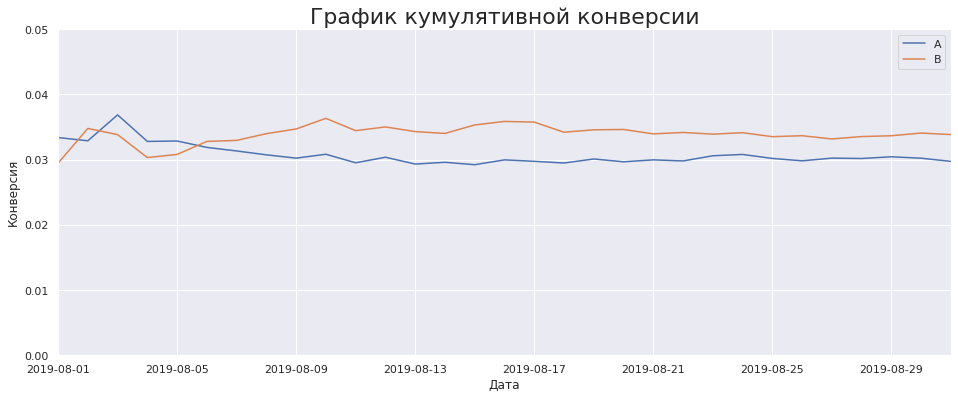

In [19]:
cumulativeData['conversion'] = cumulativeData['orders']/cumulativeData['visitors']
cumulativeDataA = cumulativeData[cumulativeData['group']=='A']
cumulativeDataB = cumulativeData[cumulativeData['group']=='B']
sns.set()
fig, ax = plt.subplots(figsize=(16,6))
sns.lineplot(x=cumulativeDataA['date'], y=cumulativeDataA['conversion'], label='A')
sns.lineplot(x=cumulativeDataB['date'], y=cumulativeDataB['conversion'], label='B')
plt.title('График кумулятивной конверсии', fontsize=22)
plt.xlabel('Дата', size=12)
plt.ylabel('Конверсия', size=12)
plt.axis(['2019-08-01', '2019-08-31', 0, 0.05])
plt.show()

Группы колебались около одного значения, но затем конверсия группы B вырвалась вперёд и зафиксировалась, а конверсия группы A просела и также зафиксировалась.

Построим график относительного изменения кумулятивной конверсии.

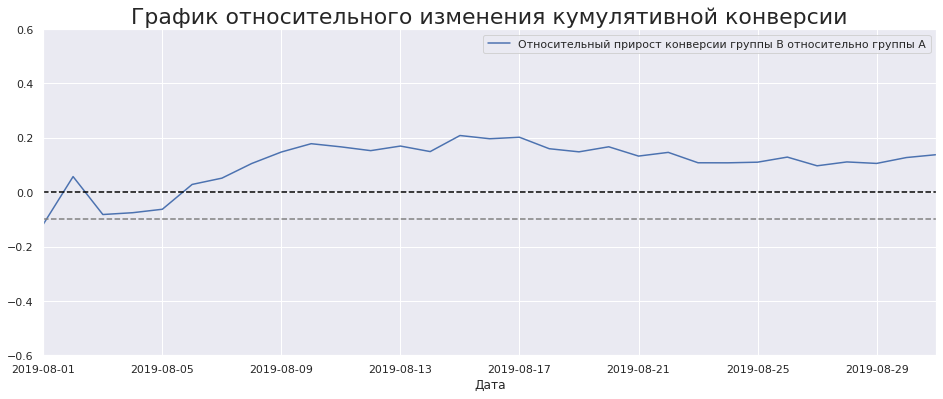

In [20]:
mergedCumulativeConversions = cumulativeDataA[['date','conversion']]\
        .merge(cumulativeDataB[['date','conversion']], left_on='date', right_on='date', how='left', suffixes=['A', 'B'])
sns.set()
fig, ax = plt.subplots(figsize=(16,6))
sns.lineplot(x=mergedCumulativeConversions['date'], y=mergedCumulativeConversions['conversionB']/mergedCumulativeConversions['conversionA']-1, label="Относительный прирост конверсии группы B относительно группы A")
plt.title('График относительного изменения кумулятивной конверсии', fontsize=22)
plt.xlabel('Дата', size=12)
plt.axhline(y=0, color='black', linestyle='--')
plt.axhline(y=-0.1, color='grey', linestyle='--')
plt.axis(['2019-08-01', '2019-08-31', -0.6, 0.6])
plt.show()

Видим, что в самом начале группа B незначительно проигрывала, но затем вырвалась вперёд. В целом можно сказать, что отношение конверсии установилось. Построим точечный график количества заказов по пользователям. Для начала подсчитаем количество заказов по пользователям и посмотрим на результат.

In [21]:
ordersByUsers = orders.drop(['group', 'revenue', 'date'], axis=1)\
        .groupby('visitorId', as_index=False)\
        .agg({'transactionId' : pd.Series.nunique})
ordersByUsers.columns = ['userId','orders']
ordersByUsers.sort_values(by='orders',ascending=False).head(10)

,userId,orders
1023,4256040402,11
591,2458001652,11
569,2378935119,9
487,2038680547,8
44,199603092,5
744,3062433592,5
55,237748145,5
917,3803269165,5
299,1230306981,5
897,3717692402,5


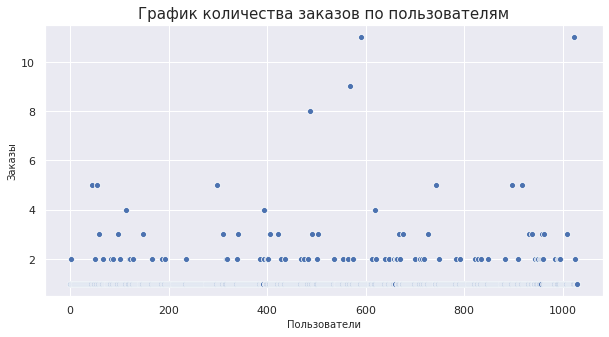

In [22]:
x_values = pd.Series(range(0,len(ordersByUsers)))
fig, ax = plt.subplots(figsize=(10,5))
sns.set()
sns.scatterplot(x= x_values, y= ordersByUsers['orders'])
plt.title('График количества заказов по пользователям', fontsize=15)
plt.xlabel('Пользователи', size=10)
plt.ylabel('Заказы', size=10)
plt.show()

Мы видим много пользователей с 2-3 заказами. Их точная доля не ясна — непонятно, считать их аномалиями или нет. Посчитаем выборочные перцентили количества заказов на одного пользователя.

In [23]:
np.percentile(ordersByUsers['orders'], [95, 99])

array([2., 4.])

Не более 5% пользователей оформляли больше чем 2 заказа. И только 1% пользователей заказывали более 4-х раз. Выберем за нижнюю границу 2 заказа и отсеим аномальных пользователей по ней.

Построим точечный график стоимостей заказов.

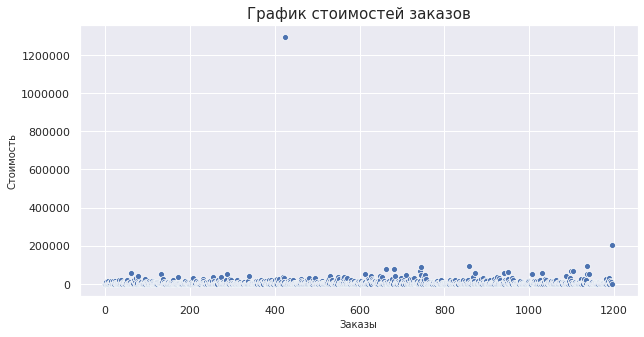

In [24]:
x_values = pd.Series(range(0,len(orders['revenue'])))
fig, ax = plt.subplots(figsize=(10,5))
sns.set()
sns.scatterplot(x= x_values, y= orders['revenue'])
plt.title('График стоимостей заказов', fontsize=15)
plt.xlabel('Заказы', size=10)
plt.ylabel('Стоимость', size=10)
plt.show()

Видим, что есть несколько чуть более дорогих заказов по сравнению с остальными и один заказ, который явно является аномалией. Посчитаем 95-й и 99-й перцентили стоимости заказов.

In [25]:
np.percentile(orders['revenue'], [95, 99])

array([28000. , 58233.2])

Не более 5% заказов дороже 28000 и не более 1% дороже 58233. Примем 28000 за нижнюю границу и по ней будем отсеивать аномалии.

Посчитаем статистическую значимость различий в конверсии между группами по «сырым» данным - без удаления аномальных пользователей. Начнём с подготовки данных. Сделаем таблицу `data`, в которой соберем данные о заказах и выручке (для групп A и B отдельно), кумулятивном количестве заказов и выручки (для групп A и B отдельно), а также количестве посетителей, в том числе кумулятивном (для групп A и B отдельно).

In [26]:
#считаем количество поситителей в день и кумулятивное количество поситителей для группы А
visitorsADaily = visitors[visitors['group']=='A'][['date', 'visitors']]
visitorsADaily.columns = ['date', 'visitorsPerDateA']
visitorsACummulative = visitorsADaily\
        .apply(lambda x: visitorsADaily[visitorsADaily['date'] <= x['date']]\
        .agg({'date' : 'max', 'visitorsPerDateA' : 'sum'}), axis=1)
visitorsACummulative.columns = ['date', 'visitorsCummulativeA']

#считаем количество поситителей в день и кумулятивное количество поситителей для группы В
visitorsBDaily = visitors[visitors['group']=='B'][['date', 'visitors']]
visitorsBDaily.columns = ['date', 'visitorsPerDateB']
visitorsBCummulative = visitorsBDaily\
        .apply(lambda x: visitorsBDaily[visitorsBDaily['date'] <= x['date']]\
        .agg({'date' : 'max', 'visitorsPerDateB' : 'sum'}), axis=1)
visitorsBCummulative.columns = ['date', 'visitorsCummulativeB']

#считаем количество заказов в день и кумулятивное количество заказов для группы А
ordersADaily = orders[orders['group']=='A'][['date', 'transactionId', 'visitorId', 'revenue']]\
        .groupby('date', as_index=False)\
        .agg({'transactionId' : pd.Series.nunique, 'revenue' : 'sum'})
ordersADaily.columns = ['date', 'ordersPerDateA', 'revenuePerDateA']

ordersACummulative = ordersADaily.apply(
    lambda x: \
        ordersADaily[ordersADaily['date'] <= x['date']]\
            .agg({
                'date' : 'max',
                'ordersPerDateA' : 'sum',
                'revenuePerDateA' : 'sum'}), axis=1).sort_values(by=['date'])
ordersACummulative.columns = ['date', 'ordersCummulativeA', 'revenueCummulativeA']

#считаем количество заказов в день и кумулятивное количество заказов для группы В
ordersBDaily = orders[orders['group']=='B'][['date', 'transactionId', 'visitorId', 'revenue']]\
        .groupby('date', as_index=False)\
        .agg({'transactionId' : pd.Series.nunique, 'revenue' : 'sum'})
ordersBDaily.columns = ['date', 'ordersPerDateB', 'revenuePerDateB']

ordersBCummulative = ordersBDaily.apply(
    lambda x: \
        ordersBDaily[ordersBDaily['date'] <= x['date']]\
            .agg({
                'date' : 'max',
                'ordersPerDateB' : 'sum',
                'revenuePerDateB' : 'sum'}), axis=1).sort_values(by=['date'])
ordersBCummulative.columns = ['date', 'ordersCummulativeB', 'revenueCummulativeB']

#соединяем таблицы между собой в один датафрейм - data
data = ordersADaily.merge(ordersBDaily, left_on='date', right_on='date', how='left')\
    .merge(ordersACummulative, left_on='date', right_on='date', how='left')\
    .merge(ordersBCummulative, left_on='date', right_on='date', how='left')\
    .merge(visitorsADaily, left_on='date', right_on='date', how='left')\
    .merge(visitorsBDaily, left_on='date', right_on='date', how='left')\
    .merge(visitorsACummulative, left_on='date', right_on='date', how='left')\
    .merge(visitorsBCummulative, left_on='date', right_on='date', how='left')

data.head()

,date,ordersPerDateA,revenuePerDateA,ordersPerDateB,revenuePerDateB,ordersCummulativeA,revenueCummulativeA,ordersCummulativeB,revenueCummulativeB,visitorsPerDateA,visitorsPerDateB,visitorsCummulativeA,visitorsCummulativeB
0,2019-08-01,24,148579,21,101217,24,148579,21,101217,719,713,719,713
1,2019-08-02,20,93822,24,165531,44,242401,45,266748,619,581,1338,1294
2,2019-08-03,24,112473,16,114248,68,354874,61,380996,507,509,1845,1803
3,2019-08-04,16,70825,17,108571,84,425699,78,489567,717,770,2562,2573
4,2019-08-05,25,124218,23,92428,109,549917,101,581995,756,707,3318,3280


Создадим переменные `ordersByUsersA` и `ordersByUsersB` со столбцами `userId` и `orders`. В них для пользователей, которые заказывали хотя бы 1 раз, укажем число совершённых заказов.

In [27]:
ordersByUsersA = orders[orders['group']=='A'].groupby('visitorId', as_index=False).agg({'transactionId' : pd.Series.nunique})
ordersByUsersA.columns = ['userId', 'orders']
ordersByUsersB = orders[orders['group']=='B'].groupby('visitorId', as_index=False).agg({'transactionId' : pd.Series.nunique})
ordersByUsersB.columns = ['userId', 'orders']

Объявим переменные `sampleA` и `sampleB`, в которых пользователям из разных групп будет соответствовать количество заказов. Тем, кто ничего не заказал, будут соответствовать нули. Это нужно, чтобы подготовить выборки к проверке критерием Манна-Уитни.

In [28]:
sampleA = pd.concat([ordersByUsersA['orders'],pd.Series(0, index=np.arange(data['visitorsPerDateA'].sum() - len(ordersByUsersA['orders'])), name='orders')],axis=0)
sampleB = pd.concat([ordersByUsersB['orders'],pd.Series(0, index=np.arange(data['visitorsPerDateB'].sum() - len(ordersByUsersB['orders'])), name='orders')],axis=0)

Применим критерий Манна-Уитни отформатируем p-value, округлив его до трёх знаков после запятой. Выведем относительный прирост конверсии группы B (конверсия группы B / конверсия группы A - 1). Округлим до трёх знаков после запятой. Сформулируем гипотезы:

<b>Нулевая гипотеза:</b> значимых различий в конверсии групп A и B по "сырым" данным <b>нет</b>

<b>Альтернативная гипотеза:</b> значимые различия в конверсии групп A и B по "сырым" данным <b>есть</b>

In [29]:
"Pvalue: {0:.3f}".format(stats.mannwhitneyu(sampleA, sampleB)[1])

'Pvalue: 0.008'

In [30]:
"Относительный прирост конверсии группы B: {0:.3f}".format(sampleB.mean()/sampleA.mean()-1)

'Относительный прирост конверсии группы B: 0.138'

По «сырым» данным различие в конверсии групп A и B есть. P-value = 0.008 меньше 0.05. Значит, нулевую гипотезу о том, что статистически значимых различий в конверсии между группами нет, мы отвергаем. Относительный проигрыш группы А равен 13.8% — второе число в выводе.

Чтобы рассчитать статистическую значимость различий в среднем чеке между сегментами, передадим критерию `mannwhitneyu()` данные о выручке с заказов. Также найдём относительные различия в среднем чеке между группами. Перед этим сформулируем нулевую и альтернативную гипотезы:


<b>Нулевая гипотеза:</b> значимых различий в средних чеках групп A и B по "сырым" данным <b>нет</b>

<b>Альтернативная гипотеза:</b> значимые различия в средних чеках групп A и B по "сырым" данным <b>есть</b>

In [31]:
"Pvalue: {0:.3f}".format(stats.mannwhitneyu(orders[orders['group']=='A']['revenue'], orders[orders['group']=='B']['revenue'])[1])

'Pvalue: 0.365'

In [32]:
"Относительный прирост среднего чека группы B: {0:.3f}".format(orders[orders['group']=='B']['revenue'].mean()/orders[orders['group']=='A']['revenue'].mean()-1)

'Относительный прирост среднего чека группы B: 0.259'

P-value значительно больше 0.05. Значит, причин отвергать нулевую гипотезу и считать, что в среднем чеке есть различия, нет. Однако, средний чек группы B значительно выше среднего чека группы A (на 25.9%).

Теперь сделаем срезы пользователей с числом заказов больше 2 — `usersWithManyOrders` и пользователей, совершивших заказы дороже 28 000 — `usersWithExpensiveOrders`. Объединим их в таблице `abnormalUsers` и узнаем, сколько всего аномальных пользователей методом `shape()`.

In [33]:
usersWithManyOrders = pd.concat([ordersByUsersA[ordersByUsersA['orders'] > 2]['userId'], ordersByUsersB[ordersByUsersB['orders'] > 2]['userId']], axis = 0)
usersWithExpensiveOrders = orders[orders['revenue'] > 28000]['visitorId']
abnormalUsers = pd.concat([usersWithManyOrders, usersWithExpensiveOrders], axis = 0).drop_duplicates().sort_values()
abnormalUsers.shape

(74,)

74 аномальных пользователя. Узнаем, как их действия повлияли на результаты теста. Посчитаем статистическую значимость различий в конверсии между группами теста по очищенным данным. Сначала подготовим выборки количества заказов по пользователям по группам теста.

In [34]:
sampleAFiltered = pd.concat([ordersByUsersA[np.logical_not(ordersByUsersA['userId']\
        .isin(abnormalUsers))]['orders'],pd.Series(0, index=np.arange(data['visitorsPerDateA']\
        .sum() - len(ordersByUsersA['orders'])),name='orders')],axis=0)

sampleBFiltered = pd.concat([ordersByUsersB[np.logical_not(ordersByUsersB['userId']\
        .isin(abnormalUsers))]['orders'],pd.Series(0, index=np.arange(data['visitorsPerDateB']\
        .sum() - len(ordersByUsersB['orders'])),name='orders')],axis=0) 

Применим статистический критерий Манна-Уитни к полученным выборкам.

<b>Нулевая гипотеза:</b> значимых различий в конверсии групп A и B по "очищенным" данным <b>нет</b>

<b>Альтернативная гипотеза:</b> значимые различия в конверсии групп A и B по "очищенным" данным <b>есть</b>

In [35]:
"Pvalue: {0:.3f}".format(stats.mannwhitneyu(sampleAFiltered, sampleBFiltered)[1])

'Pvalue: 0.007'

In [36]:
"Относительный прирост конверсии группы B: {0:.3f}".format(sampleBFiltered.mean()/sampleAFiltered.mean()-1)

'Относительный прирост конверсии группы B: 0.173'

Результаты по конверсии практически не изменились. Посмотрим, произошли ли изменения по среднему чеку.

<b>Нулевая гипотеза:</b> значимых различий в средних чеках групп A и B по "очищенным" данным <b>нет</b>

<b>Альтернативная гипотеза:</b> значимые различия в средних чеках групп A и B по "очищенным" данным <b>есть</b>

In [37]:
"Pvalue: {0:.3f}".format(stats.mannwhitneyu(
    orders[np.logical_and(
        orders['group']=='A',
        np.logical_not(orders['visitorId'].isin(abnormalUsers)))]['revenue'],
    orders[np.logical_and(
        orders['group']=='B',
        np.logical_not(orders['visitorId'].isin(abnormalUsers)))]['revenue'])[1])

'Pvalue: 0.369'

In [38]:
"Относительный прирост среднего чека группы B: {0:.3f}".format(
    orders[np.logical_and(orders['group']=='B',np.logical_not(orders['visitorId'].isin(abnormalUsers)))]['revenue'].mean()/
    orders[np.logical_and(
        orders['group']=='A',
        np.logical_not(orders['visitorId'].isin(abnormalUsers)))]['revenue'].mean() - 1)

'Относительный прирост среднего чека группы B: -0.020'

P-value остался на том же уровне, а разница между сегментами изменилась: теперь группа B уступает (хоть и не намного - на 2%). Хотя общие выводы по результатам теста по очищенным данным не изменились, такой пример показывает, как сильно аномалии могут влиять на результаты A/B-теста. 

## Вывод

После проведения и анализа теста мы получили следующие факты:
* обнаружено статистически значимое различие по конверсии между группами и по «сырым», и по данным после фильтрации аномалий. Причём после фильтрации прирост по группе B увеличился с 13.8% до 17.3%;
* нет статистически значимого различия по среднему чеку между группами ни по «сырым», ни по данным после фильтрации аномалий. После фильрации аномалий ощутимой разницы в показателях по среднему чеку нет.

Учитывая эти факты, мы принимаем решение завершить тест и зафиксировать победу группы B. 
